In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Wine Quality dataset
wine_data = load_wine()
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target)

In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int64

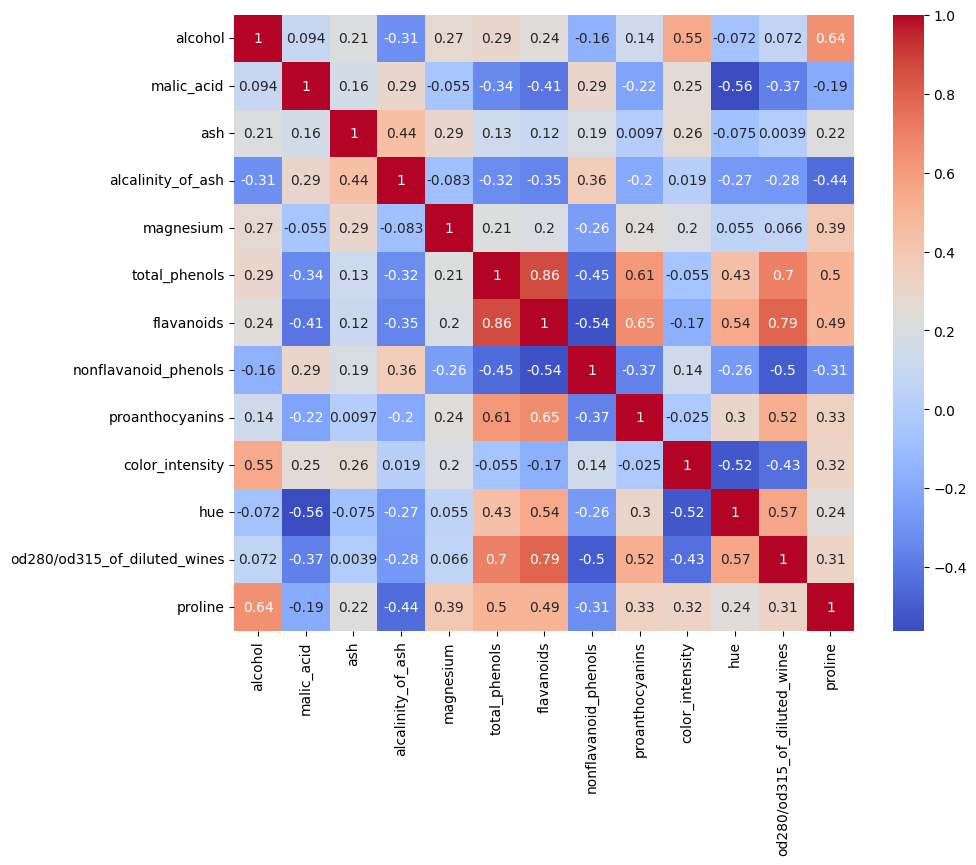

In [21]:
import seaborn as sns

corr = pd.DataFrame(X).corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [38]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, wine_data.target, test_size=0.2, random_state=42)


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
k = 5  # Number of top features to select
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [50]:
selected_mask = selector.get_support()

# print out the indices of the selected features
selected_indices = np.where(selected_mask)[0]
selected_features = [wine_data.feature_names[i] for i in selected_indices]
print(selected_features)

['alcalinity_of_ash', 'magnesium', 'flavanoids', 'color_intensity', 'proline']


In [45]:
n_components = 2  
pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train_selected)
X_test_reduced = pca.transform(X_test_selected)


In [42]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_reduced, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

In [57]:

class_report = classification_report(y_test, y_pred)


print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       0.81      0.93      0.87        14
           2       0.67      0.25      0.36         8

    accuracy                           0.81        36
   macro avg       0.77      0.73      0.71        36
weighted avg       0.78      0.81      0.77        36



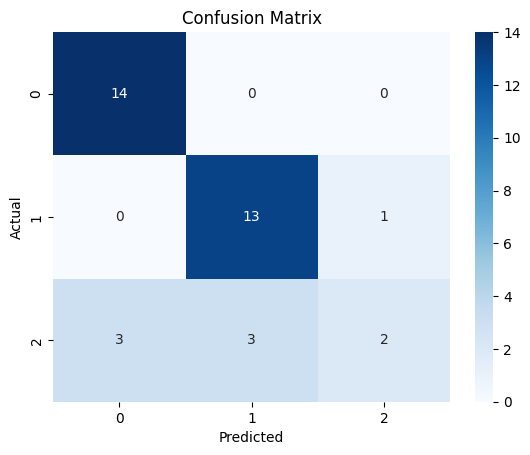

In [56]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()